<a href="https://colab.research.google.com/github/Aswin2808/AI/blob/main/fruit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Directory paths
train_dir = '/content/drive/MyDrive/archive/MY_data/train'
validation_dir = '/content/drive/MyDrive/archive/MY_data/test'


In [ ]:
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(validation_dir):
    raise FileNotFoundError(f"Validation directory not found: {validation_dir}")

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2301 images belonging to 10 classes.
Found 1035 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)


Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 1.2079 - accuracy: 0.5681
Epoch 1: val_loss did not improve from 1.46076
71/71 [==============================] - 137s 2s/step - loss: 1.2079 - accuracy: 0.5681 - val_loss: 1.8104 - val_accuracy: 0.4697
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 1.1539 - accuracy: 0.5809
Epoch 2: val_loss did not improve from 1.46076
71/71 [==============================] - 142s 2s/step - loss: 1.1539 - accuracy: 0.5809 - val_loss: 1.7532 - val_accuracy: 0.4434
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.1438 - accuracy: 0.5712
Epoch 3: val_loss did not improve from 1.46076
71/71 [==============================] - 142s 2s/step - loss: 1.1438 - accuracy: 0.5712 - val_loss: 1.5312 - val_accuracy: 0.4678
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.0953 - accuracy: 0.6056
Epoch 4: val_loss did not improve from 1.46076
71/71 [==============================] - 141s 

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

32/32 [==============================] - 17s 519ms/step - loss: 1.3990 - accuracy: 0.5742
Validation Loss: 1.3990094661712646
Validation Accuracy: 0.57421875


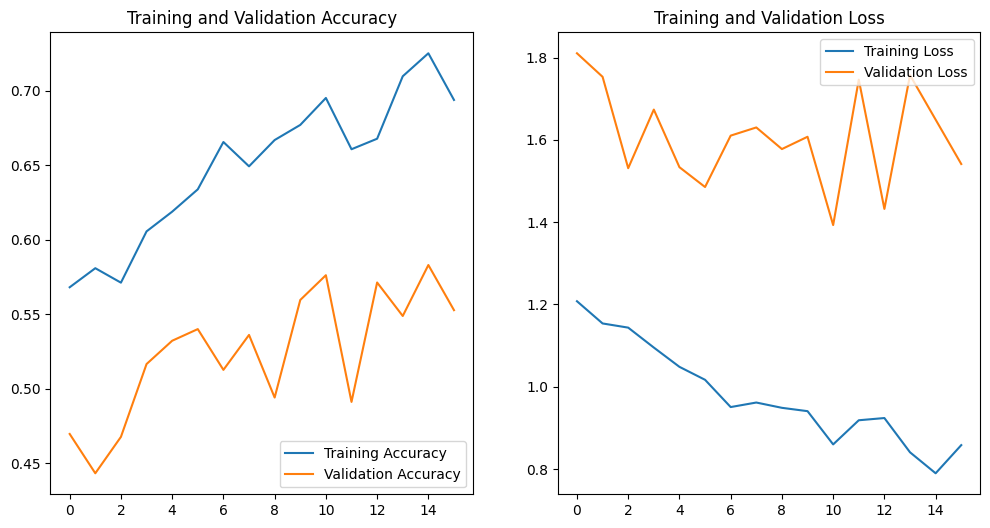

In [ ]:
# Plotting training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('fruit_classification_model.h5')

In [ ]:
model = load_model('fruit_classification_model.h5')

In [ ]:
img_path = '/content/drive/MyDrive/apple.jpg'

In [ ]:
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map class indices to class names
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
predicted_class_name = class_names[predicted_class_index]

print(f'Predicted class: {predicted_class_name}')

1/1 [==============================] - 0s 136ms/step
Predicted class: watermelon
